# L08 DataSet & DataLoader

In [1]:
import torch
import numpy as np

BATCH_SIZE = 1

In [2]:
from torch.utils.data import Dataset, DataLoader

class DiabetesDataset(Dataset): # Dataset is an abstract class
    def __init__(self, filepath, train=True):
        data = np.loadtxt(filepath, delimiter=',', dtype=np.float32)
        if train:
            self.len = int(data.shape[0]*0.8)
            train_data = data[:self.len,:]
            self.x_data = torch.from_numpy(train_data[:,:-1])
            self.y_data = torch.from_numpy(train_data[:,[-1]])
        else:
            self.len = data.shape[0] - int(data.shape[0]*0.8)
            test_data = data[-self.len:,:]
            self.x_data = torch.from_numpy(test_data[:,:-1])
            self.y_data = torch.from_numpy(test_data[:,[-1]])
            
    def __getitem__(self, index):
        return self.x_data[index], self.y_data[index]
    
    def __len__(self):
        return self.len

train_dataset = DiabetesDataset('dataset/diabetes.csv.gz', train=True)
# train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True, num_workers=3, drop_last=True) # batch_zise=1  drop_last=False
train_loader = DataLoader(train_dataset, batch_size=train_dataset.len, shuffle=True, drop_last=True) # batch_zise=1  drop_last=False
test_dataset = DiabetesDataset('dataset/diabetes.csv.gz', train=False)
test_loader = DataLoader(dataset=test_dataset, batch_size=BATCH_SIZE, shuffle=False, drop_last=True)

print(train_dataset.len, train_dataset.len/32)

607 18.96875


In [3]:
# model
class LogisticRegression(torch.nn.Module):
    def __init__(self):
        super(LogisticRegression, self).__init__()
        self.linear = torch.nn.Linear(8,1)
        self.sigmoid = torch.nn.Sigmoid()
        
    def forward(self,x):
        y_pred = self.sigmoid(self.linear(x))
        return y_pred
    
logisticModel = LogisticRegression()

In [4]:
# loss
criterion = torch.nn.BCELoss()

In [5]:
# optimizer
optimizer = torch.optim.SGD(logisticModel.parameters(), lr=0.01)

In [6]:
# if __name__=='_main_':
epoch = 0
train_loss_batch = []
train_loss_epoch = []

# for epoch in  range(100):
while True:
    loss_batch = 0
    for i, (x_data, y_data) in enumerate(train_loader, 0): # default start from 0, so ignore is ok
        y_pred = logisticModel(x_data)
        loss = criterion(y_pred, y_data)
        train_loss_batch.append(loss.item())
        loss_batch += loss.item()

        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

    loss_epoch = loss_batch / BATCH_SIZE
    train_loss_epoch.append(loss_epoch)
    if(loss_epoch <= 1e-5 or epoch >= 400):
        break
    else:
        epoch += 1
        
# __main__()

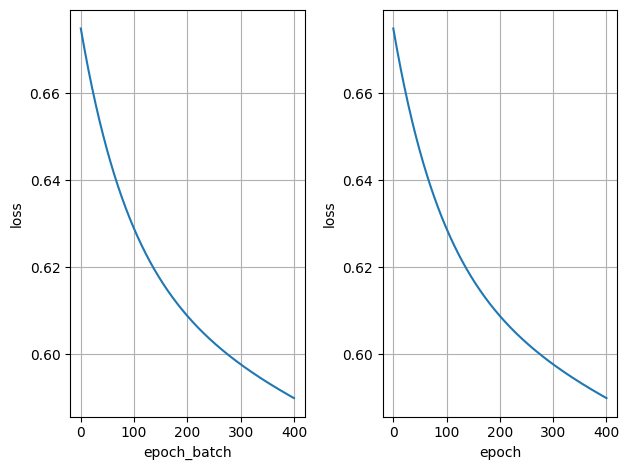

In [7]:
# train_plot
import matplotlib.pyplot as plt

plt.subplot(121)
plt.plot(train_loss_batch)
plt.xlabel("epoch_batch")
plt.ylabel("loss")
plt.grid(True)

plt.subplot(122)
plt.plot(train_loss_epoch)
plt.xlabel("epoch")
plt.ylabel("loss")
plt.grid(True)

plt.tight_layout()
# plt.savefig("image/L08_batch_size=train_dataset_len.png")
plt.show()

In [8]:
# train_param
print('w=', logisticModel.linear.weight.tolist())
print('b=', logisticModel.linear.bias.item())

w= [[-0.16151690483093262, -0.3995119631290436, -0.05341368913650513, -0.04744250327348709, -0.1217903345823288, -0.3248598277568817, -0.45189154148101807, 0.014204506762325764]]
b= 0.29460203647613525


In [9]:
# test
# if __name__=='_main_': # num_worker=0
acc_size = 0
test_size = 0
for i, (x_data, y_test_truth) in enumerate(train_loader):
    y_test_pred = logisticModel(x_data)
    y_test_pred = np.where(y_test_pred > 0.5, 1, 0) 
    acc_size += (y_test_pred == y_test_truth.tolist()).sum()
    test_size += y_pred.shape[0]
accurate_rate = acc_size / test_size
print('accurate_rate=', accurate_rate)

accurate_rate= 0.6589785831960461


In [10]:
# f = open('L08_batch_size.txt', 'w+')
# f.write('batch_size=train_dataset.len\n')
# f.write('\ttrain_loss_batch=\n\t' + str(train_loss_batch))
# f.write('\n')
# f.write('\ttrain_loss_epoch=\n\t' + str(train_loss_epoch))
# f.close()

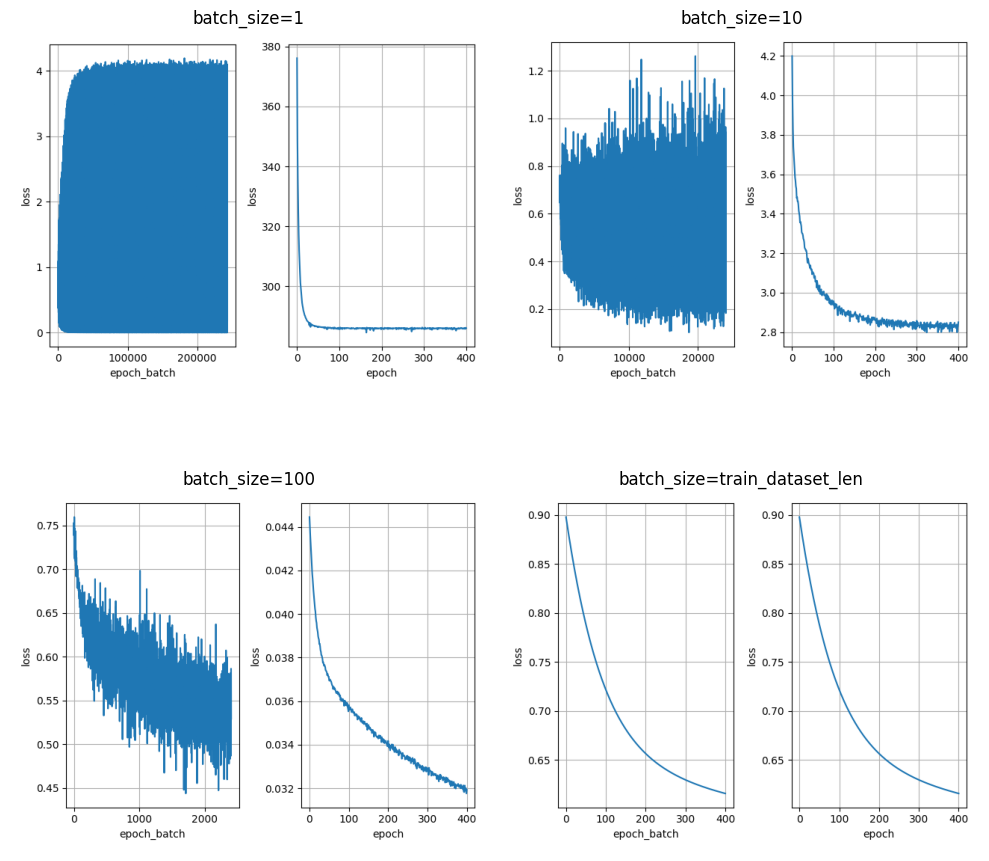

In [11]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

plt.figure(1, figsize=(10, 10))
plt.subplot(221)
plt.title('batch_size=1') # 0.78
lena = mpimg.imread('image/L08_batch_size=1.png') # np.array
plt.imshow(lena)
plt.axis('off')

plt.subplot(222)
plt.title('batch_size=10') # 0.78
lena = mpimg.imread('image/L08_batch_size=10.png')
plt.imshow(lena)
plt.axis('off')

plt.subplot(223)
plt.title('batch_size=100') # 0.76
lena = mpimg.imread('image/L08_batch_size=100.png')
plt.imshow(lena)
plt.axis('off')

plt.subplot(224)
plt.title('batch_size=train_dataset_len') # 0.66
lena = mpimg.imread('image/L08_batch_size=train_dataset_len.png')
plt.imshow(lena)
plt.axis('off')

plt.tight_layout()
plt.show()